<a href="https://colab.research.google.com/github/TabithaWKariuki/Dimensionality-reduction-Using-Unsupervised-Learning-Techniques/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning Using Association Rules

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

Part 4: Anomaly Detection

You have also been requested to check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

# 1. Importing and Installing the necessary libraries

In [ ]:
# Checking available packages

library()

In [4]:
# Installing anomalize package

install.packages("anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘TTR’, ‘prodlim’, ‘globals’, ‘later’, ‘quadprog’, ‘quantmod’, ‘listenv’, ‘parallelly’, ‘gower’, ‘hardhat’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘RcppRoll’, ‘future’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘tsfeatures’, ‘Rcpp’, ‘timetk’, ‘sweep’, ‘tibbletime’




In [5]:
# Anomalize library

library(anomalize)

══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [6]:
# Tidyverse library

library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [7]:
 # Tibble tidyverse

library('tibble')

In [8]:
# Tibbletime library

library('tibbletime')


Attaching package: ‘tibbletime’


The following object is masked from ‘package:stats’:

    filter




In [9]:
# Dplyr library

library('dplyr')

In [24]:
library(tibbletime)

# 2. Loading our dataset

In [11]:
# Loading the dataset

data3 = read.csv('http://bit.ly/CarreFourSalesDataset')

# 3. Understanding our dataset

In [12]:
# Checking the top rows of our data

head(data3)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [ ]:
# Checking the bottom rows of the data

tail(data3)

,Date,Sales
,<chr>,<dbl>
995,2/18/2019,63.9975
996,1/29/2019,42.3675
997,3/2/2019,1022.4900
998,2/9/2019,33.4320
999,2/22/2019,69.1110
1000,2/18/2019,649.2990


In [ ]:
# Checking the shape of the data

dim(data3)

[1] 1000    2

In [ ]:
# Check the data types of the 2 columns

sapply(data3, class)

Date       Sales 
"character"   "numeric"

In [14]:
# Checking the structure/datatypes of the data

str(data3)

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [13]:
# Checking the attributes of the data

class(data3)

[1] "data.frame"

In [ ]:
# Highlighting the colun names

colnames(data3)

[1] "Date"  "Sales"

In [ ]:
# Checking for null values

colSums(is.na(data3))

Date Sales 
    0     0

**There are no null values in the data**

In [15]:
# Now lets find the duplicated rows in the dataset 
# and assign to a variable duplicated_rows below

duplicated_rows <- data3[duplicated(data3),]

duplicated_rows

Date,Sales
<chr>,<dbl>


**There are no duplicated rows**

In [ ]:
# Finding the sum of duplicates

sum(duplicated(data3))

[1] 0

**There are no duplicates in our data**

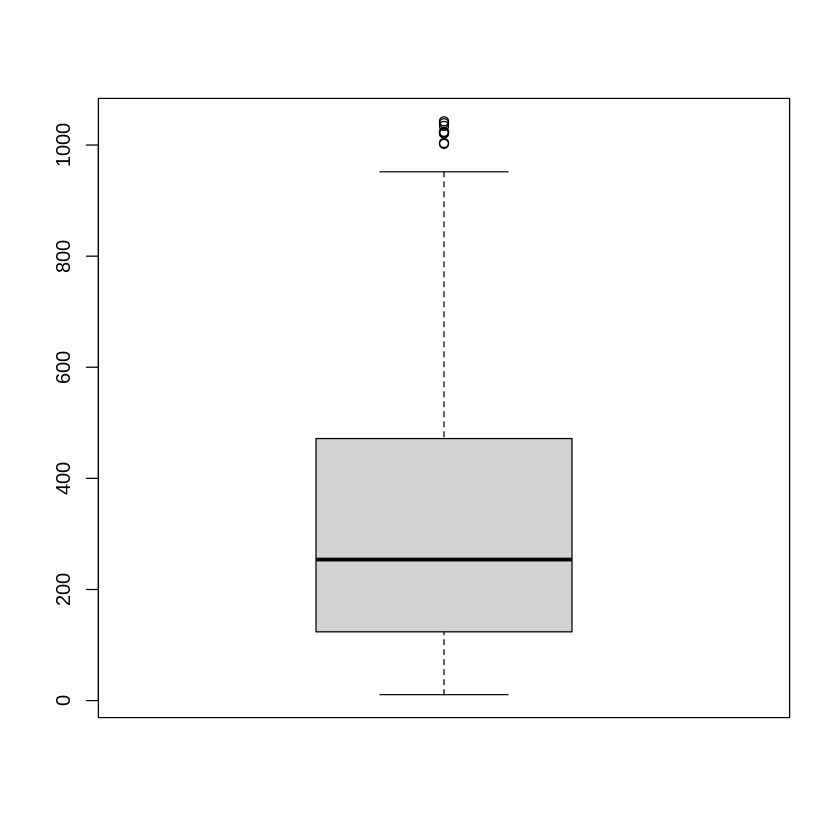

In [ ]:
# Checking for outliers in the sales column.

boxplot(data3$Sales)

# Part 4: Anomaly Detection

In [32]:
# Collect our time series data

head(tidyverse_cran_downloads)

date,count,package
<date>,<dbl>,<chr>
2017-01-01,873,tidyr
2017-01-02,1840,tidyr
2017-01-03,2495,tidyr
2017-01-04,2906,tidyr
2017-01-05,2847,tidyr
2017-01-06,2756,tidyr


In [16]:
#Convert date to Date column from string to date

data3$Date <- as.Date(data3$Date,format="%m/%d/%Y") 
glimpse(data3)

Rows: 1,000
Columns: 2
$ Date  <date> 2019-01-05, 2019-03-08, 2019-03-03, 2019-01-27, 2019-02-08, 201…
$ Sales <dbl> 548.9715, 80.2200, 340.5255, 489.0480, 634.3785, 627.6165, 433.6…


In [29]:
# Hence we have to convert the dataframe btc into a tibble object  %>% select(-one_of('Date'))
# The frequency and trend parameters are automatically set based on the time scale (or periodicity)
# of the time series using tibbletime based function under the hood.

tib <- data3 %>% rownames_to_column() %>% as.tibble() %>% 
  mutate(date = as.Date(Date, "%m/%d/%y"))%>% select(-one_of('Date'))

head(tib)

rowname,Sales,date
<chr>,<dbl>,<date>
1,548.9715,2019-01-05
2,80.2200,2019-03-08
3,340.5255,2019-03-03
4,489.0480,2019-01-27
5,634.3785,2019-02-08
6,627.6165,2019-03-25


Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 4 days

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 47 days

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



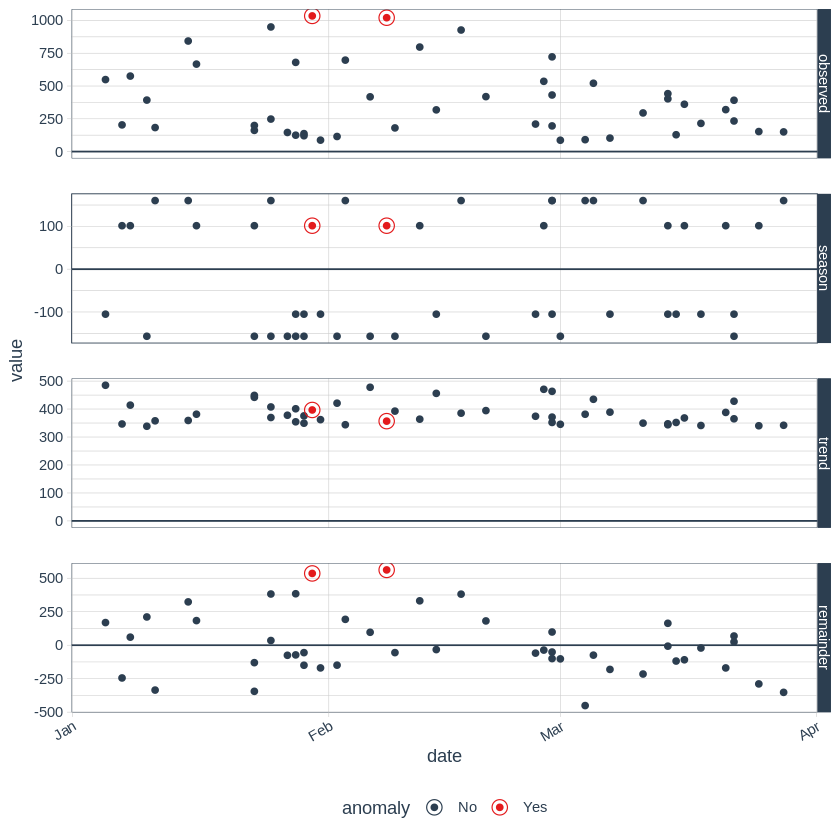

In [31]:
#Time Series Decomposition where the Time series data is decomposed 
# into Seasonal, Trend and remainder components using the time_decompose() function.
# anomalize can detect and flag anomalies in the decomposed data
# plot_anomalies() - 
# we now plot using plot_anomaly_decomposition() to visualize out data.

library(tibbletime)
x <- as_tbl_time(tib, index = date)

x %>% 
  as_period("daily")%>% 
  time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.2) %>%
  
  plot_anomaly_decomposition()

**At specified alpha of 0.05 and max_anom value of 0.2, we can see there are anomalies detected in the data.I recommend carrefour to check them out to ensure they are not fraudlent activities**